In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations, combinations

from testsuite.utilities import Pareto_split

from matplotlib.cm import hot  as colormap
from scipy.linalg import svd
from scipy.spatial import ConvexHull

In [2]:
def gen_nondominated(n_dim, n):
    points = np.abs(np.random.multivariate_normal(np.zeros(n_dim), np.diag(np.ones(n_dim)), n))
    norms =  np.linalg.norm(points, axis=1)
    return (points.T/norms).T

def gen_random_nondominated(n_dim, n):
    points = gen_nondominated(n_dim, n)
    points  = (points.T*np.random.randn(len(points))/10).T
    points = points-points.min(axis=0)
    return Pareto_split(points)[0]

In [3]:
def get_pairs(x):
    return np.array(list(combinations(x, x.shape[1]))) 

def get_extrusion(pair):
    n_points, n_dims = pair.shape
    return [np.vstack((*c, np.zeros_like(c[0]))) for c in  combinations(pair, n_dims-1)]

In [53]:
def pair_selection(pair, normal_vector):
    return np.sum([np.dot(p, normal_vector)**2 for p in pair])

def angle_sign(extrusion, v):
    e = (extrusion-extrusion.mean(axis=0))
    U, s, vt = svd(e)
    np.testing.assert_almost_equal(s[-1], 0)
    normal_vector = vt[-1]
    sign = np.dot(normal_vector, v)
    return sign>0.

def dm_choice(x, dmv):
    u, s, vh = np.linalg.svd(dmv.T)
    dmv_normal = u[:, -1]
    
    pairs = get_pairs(x)
    intersections = np.zeros(pairs.shape[0], dtype=bool)
    
    for i, pair in enumerate(pairs): 
        midpoint = np.mean(pair, axis=0)
        extrusions = get_extrusion(pair)
        
        extrusion_angles = np.zeros(len(extrusions), dtype=bool)
        for j, extrusion in enumerate(extrusions):
            ang_mp = angle_sign(extrusion, midpoint)
            ang_dm = angle_sign(extrusion, dmv.reshape(-1))
            extrusion_angles[j] = (ang_mp == ang_dm) 
        
        intersections[i] = np.all(extrusion_angles)
        
    try:
        choice_ind = np.argmin([pair_selection(p, dmv_normal) for p in pairs[intersections]])
        return pairs[intersections][choice_ind]
    except ValueError:
        # if no pair is intersected by the dmv return the nearest single point 
        return x[np.argmin([np.abs(np.dot(dmv_normal, xi)) for xi in x])].reshape(1,-1)
    

## 2D

8 points generated


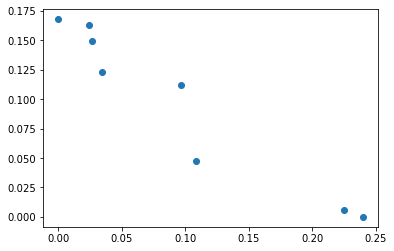

In [13]:
np.random.seed(2)
n_dim = 2
n_points = 1000
points_2d = gen_random_nondominated(n_dim, n_points) 
print('{} points generated'.format(len(points_2d)))

fig00 = plt.figure()
fig00_ax = fig00.gca()
fig00_ax.scatter(*points_2d.T)

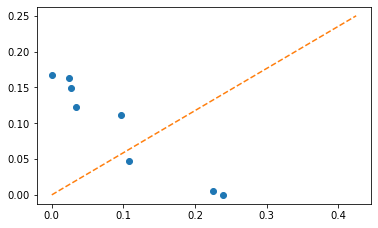

In [14]:
## dm preferences
dmv = np.array([0.85, 0.5]).reshape(1, -1)
fig00_ax.plot(*np.vstack((np.zeros_like(dmv), dmv)).T/2, c="C1", linestyle="--")
fig00_ax.axis("scaled")
fig00

In [15]:
winner = dm_choice(points_2d, dmv)

(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)
(2, 2) (1, 2)


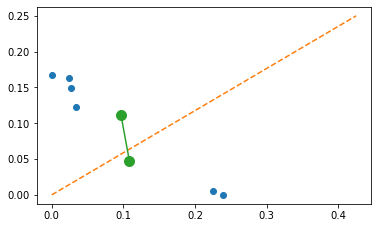

In [16]:
fig00_ax.plot(*winner.T, c="C2", marker="o", markersize=10)
fig00

In [17]:
dmv

array([[0.85, 0.5 ]])

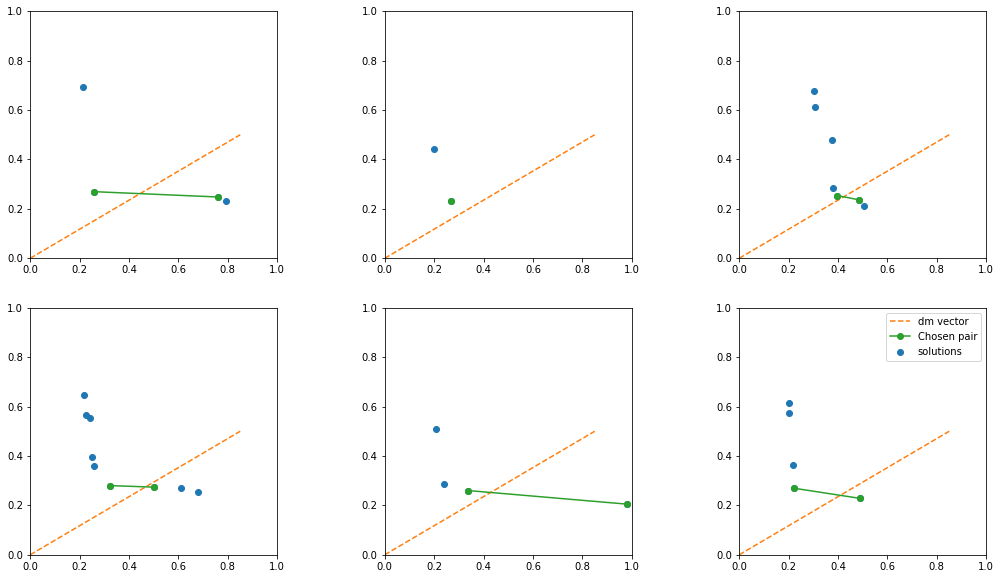

In [23]:
fig01, fig01_axes = plt.subplots(2, 3, figsize=[18, 10])
for i, ax in enumerate(fig01_axes.flat):
    np.random.seed(i)
    n_points = 43
    points_2d = Pareto_split(np.random.uniform(0.2, 1, size=(n_points,2)))[0][:10]
    
    ax.plot(*np.vstack((np.zeros_like(dmv), dmv)).T, c="C1", linestyle="--", label="dm vector")
    ax.scatter(*points_2d.T, c="C0", label="solutions")
    
    winner = dm_choice(points_2d, dmv)
    ax.plot(*winner.T, c="C2", marker="o", label="Chosen pair")
    ax.axis("scaled")
    ax.set_xlim([0., 1.])
    ax.set_ylim([0., 1.])
    
ax.legend()

## 3D

In [24]:
%matplotlib qt

In [59]:
# dm vector
dmv = np.array([.5,1.,.5]).reshape(1, -1)/2

In [60]:
np.random.seed(3)
n_dim = 3
n_points = 100
points_3d = gen_random_nondominated(n_dim, n_points)
print('{} points generated'.format(len(points_3d)))


fig10 = plt.figure(figsize=[8,8])
fig10_ax = fig10.gca(projection="3d")
fig10_ax.scatter(*points_3d.T)

lim = fig10_ax.get_xlim()[1]
fig10_ax.plot(*np.vstack((np.zeros(3), dmv)).T, c="C1", linestyle="--")

12 points generated


In [61]:
winner= dm_choice(points_3d, dmv)

In [62]:
winner

array([[0.18399998, 0.12303349, 0.13409813]])

In [63]:
fig10_ax.plot(*np.vstack((winner, winner[0])).T, c="C2", marker="o")

In [64]:
fig10_ax

<Axes3DSubplot:>

In [65]:
fig11, fig11_axes = plt.subplots(2, 3, figsize=[18, 10],  subplot_kw=dict(projection='3d'))
for i, ax in enumerate(fig11_axes.flat):
    np.random.seed(i+20)
    n_points = 43
    points_3d = Pareto_split(np.random.uniform(0.2, 1, size=(n_points,3)))[0][:20]
    
    ax.plot(*np.vstack((np.zeros_like(dmv), dmv*1.5)).T, c="C1", linestyle="--", label="dm vector")
    ax.scatter(*points_3d.T, c="C0", label="solutions")
    
    try:
        winner = dm_choice(points_3d, dmv)
        ax.plot(*np.vstack((winner, winner[0])).T, c="C2", marker="o", label="Chosen pair")
    except:
        pass
    ax.set_xlim([0., 1.])
    ax.set_ylim([0., 1.])
    ax.view_init(elev=10., azim=25)
    
ax.legend()

### 4D

In [17]:
points_4d = Pareto_split(np.random.uniform(0.2, 1, size=(n_points,4)))[0][:30]
points_4d.shape

(9, 4)

In [18]:
dmv = np.array([1., 1., 1., 1.]).reshape(1, -1)

In [19]:
winner= dm_choice(points_4d, dmv)

In [20]:
winner

array([[0.84825139, 0.24807694, 0.55979485, 0.85053642],
       [0.4113907 , 0.25072079, 0.39368614, 0.26805637],
       [0.21027846, 0.33251346, 0.24829315, 0.42252475],
       [0.22202277, 0.42318214, 0.2601364 , 0.2381907 ]])